In [1]:
import os
import re
import logging

import numpy as np
import pandas as pd
import matplotlib.pylab as plt

from vuepoint.comment_miner import download_comments
from vuepoint.StatsPipeline import get_corpus_stats
from vuepoint.TextPipeline import format_sent_topics
from vuepoint.TextPipeline import preprocess_corpus
from vuepoint.ModelingPipeline import process_words

logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

In [2]:
corpus_path = 'downloads/huawei/IsThisTheEndOfHuawei'
corpus = pd.read_json(corpus_path, encoding='utf-8', lines=True)
corpus.text.head()

0    This is a obviously a very complicated topic. ...
1                                                  oof
2    This is only the start. Who's next? Xiaomi? On...
3    Bringing back the backdoor app installs aye? A...
4    I just believe that trump is scared that a war...
Name: text, dtype: object

In [3]:
corpus.text.describe()

count      11353
unique     11221
top       Me too
freq          14
Name: text, dtype: object

In [4]:
get_corpus_stats(corpus, 'text')
corpus = corpus[corpus.word_count > 10]
preprocess_corpus(corpus, 'text')
corpus.text.head()

extracting text features
extracting content features from text
extracting text sentiment features


0    obviously complicated topic tried cover much c...
3    bringing back backdoor app installs aye almost...
4    believe trump scared war going happen chinese ...
5              sony xperia fan good prefer japan korea
7                 hey guy start podcast spotify itunes
Name: text, dtype: object

In [5]:
corpus.text.describe()

count                                                  7122
unique                                                 7082
top       simple google evil evil democracy safety manki...
freq                                                      5
Name: text, dtype: object

In [6]:
from vuepoint import NgramFreq
corpus_text = corpus.text.values.tolist()

In [7]:
NgramFreq.get_top_unigrams(corpus_text, topn=10)

[('company', 1680),
 ('google', 1609),
 ('chinese', 1435),
 ('like', 1194),
 ('phone', 1083),
 ('government', 967),
 ('trump', 966),
 ('apple', 917),
 ('country', 856),
 ('people', 802)]

In [8]:
NgramFreq.get_top_bigrams(corpus_text, topn=10)

[('chinese government', 238),
 ('chinese company', 179),
 ('united state', 131),
 ('trade war', 116),
 ('tech company', 112),
 ('american company', 103),
 ('google service', 95),
 ('national security', 82),
 ('company like', 80),
 ('free market', 79)]

In [9]:
NgramFreq.get_top_trigrams(corpus_text, topn=10)

[('chinese communist party', 20),
 ('google play store', 19),
 ('company like google', 15),
 ('stealing intellectual property', 13),
 ('weapon mass destruction', 12),
 ('steal intellectual property', 11),
 ('chinese government ban', 10),
 ('google facebook youtube', 10),
 ('open source android', 10),
 ('trump got bribed', 10)]

In [10]:
NgramFreq.get_top_quadgrams(corpus_text, topn=10)

[('trump got bribed apple', 10),
 ('got bribed apple trump', 9),
 ('bribed apple trump got', 9),
 ('apple trump got bribed', 9),
 ('chinese government ban google', 5),
 ('simple google evil evil', 5),
 ('google evil evil democracy', 5),
 ('evil evil democracy safety', 5),
 ('evil democracy safety mankind', 5),
 ('democracy safety mankind human', 5)]

In [11]:
import spacy

nlp = spacy.load('en_core_web_lg')
doc = nlp(str(corpus_text))

In [12]:
doc_sents = list(doc.sents)
doc_sents

[['obviously complicated topic tried cover much could hope solution compromise reached way thing going,
 seem like productive way forward', 'bringing back backdoor app installs aye almost take back old rooting day', 'believe trump scared war going happen,
 chinese product see', 'sony xperia fan good prefer japan korea', 'hey guy start podcast spotify itunes', 'find compromise apple production mostly', 'dawkins already go spotify type lew later', 'retaliate cutting,
 rare earth mineral america sure america able find substitute fast enough take year volume right away without crucial rare earth supply america even able maintain high tech military hardware manufacture new missile sustain never ending bombing war middle east based,
 seen lack resolve necessary win trade war', ',
 man love impartiality video good see someone showing picking one side great work lew', 'country doesnt exist politicaly north cyprus sick politics politician fucking chill fucking stupid trump,
 fucking,
 stupid am

In [13]:
max_doc_sent = [len(sent) for sent in doc_sents]
[sent for sent in doc_sents if len(sent) == max(max_doc_sent)]

[let government install backdoor solution product', 'cia intercepting cisco firewall smart switch destined swapping firmware adding injection vector', 'though backdoor detect worry', 'robo niceguy backdoor kidding even mom backdoor really easy get ccp cent', 'reinhadion ra alwar calm u got triggered quick like diarrhea lol', 'dan brian gerona spot mate lot bcz trade war', 'reinhadion ra alwar look communist fucking aussie', 'niceguy ever heard good old day mccarthyism back agree commie lol', 'must banned cia nsa spy phone call', 'backdoor smartphones happens since g machine something hwawei product like stealing company technology think hwawei good genius got top company year really', 'america put back door hawiewe pissed', 'yb could stolen g technology company made yet', 'reconsider diplomatic stance world taking everyone ride long', 'archit kton like rumsfeld referring unknown unknown action ever taken something proven fundamental aspect law analyze device backdoor none found assume 

In [14]:
[p for p in dir(doc[:1000]) if not p.startswith('_')]

['as_doc',
 'conjuncts',
 'doc',
 'end',
 'end_char',
 'ent_id',
 'ent_id_',
 'ents',
 'get_extension',
 'get_lca_matrix',
 'has_extension',
 'has_vector',
 'label',
 'label_',
 'lefts',
 'lemma_',
 'lower_',
 'merge',
 'n_lefts',
 'n_rights',
 'noun_chunks',
 'orth_',
 'remove_extension',
 'rights',
 'root',
 'sent',
 'sentiment',
 'set_extension',
 'similarity',
 'start',
 'start_char',
 'string',
 'subtree',
 'text',
 'text_with_ws',
 'to_array',
 'upper_',
 'vector',
 'vector_norm',
 'vocab']

In [15]:
# sentences where 'hwawei' is mentioned
sent_hwawei = [sent for sent in doc.sents if 'hwawei' in sent.string]
sent_hwawei

[president hard work credibility country built let donald trump dirty tactic clouded judgement', 'bloatwares google apps developer make apps available apk file without need playstore', 'guy backdoor smartphones happens since g machine something hwawei product like stealing company technology even hwawei saying steal company technology get give incentive real hwawei worker sayed,
 fbi guy think think hwawei good genius got top company year really', 'may start downfall google may lost half world market make apple microsoft happy', 'main business telecom equipment whose client enterprise consumer level product like smartphones', 'big contract,
 let government install backdoor solution product', 'cia intercepting cisco firewall smart switch destined swapping firmware adding injection vector', 'though backdoor detect worry', 'robo niceguy backdoor kidding even mom backdoor really easy get ccp cent', 'reinhadion ra alwar calm u got triggered quick like diarrhea lol', 'dan brian gerona spot m

- **Lexical dispersion plot**

> Plotting the spatial frequency of words mentioned/scattered about over the range of the text document

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f867f9f91d0>,
      dtype=object)

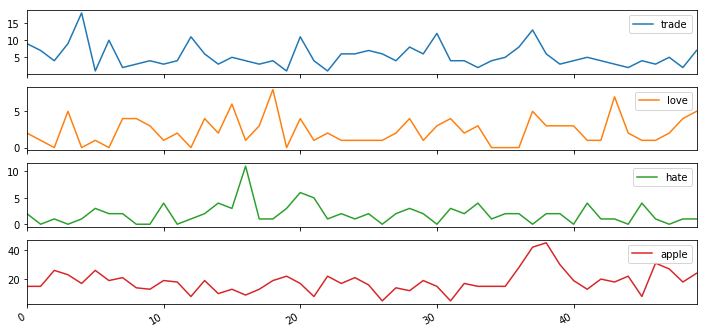

In [16]:
from pylab import rcParams

def locations(gauge, tags):
    return pd.Series(np.histogram(
        [word.i for word in tags if word.text.lower() == gauge], bins=50)[0])

rcParams['figure.figsize'] = 12, 6
pd.DataFrame(
    {name: locations(name.lower(), doc)
    for name in ['trade', 'love', 'hate', 'apple']}
).plot(subplots=True)

In [28]:
options = {
    "colors":{"GPE": "grey", "DATE": "red"}
}
spacy.displacy.render(doc[:200], style='ent', jupyter=True, options=options)